In [44]:
import numpy as np
import matplotlib.pyplot as plt

#for theory refer notes

In [46]:
## 1. Data generate X , Y

In [48]:
def generateDataset(m):
    m=100 #100 samples
    X = np.random.randn(m)*10 #since randn produces normal distribn bw -1 and 1 ...we are changing the range to -10 to 10 which does 
                                #not effect the system
    noise = np.random.randn(m) *4
    y =3*X + 1 + noise #here generally we have noise(other features which will effect the output)
    return X,y



In [50]:
X,y= generateDataset(100)


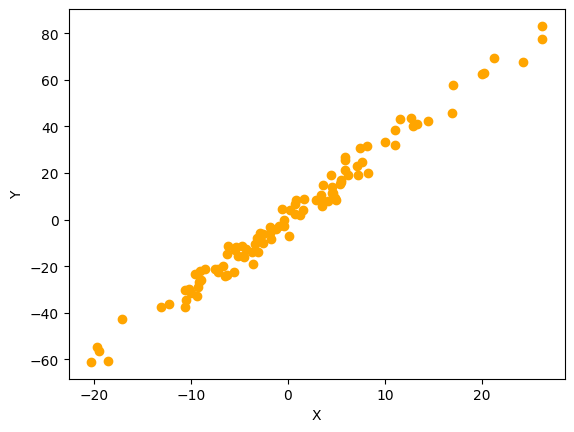

In [52]:
def plotData(X,y,color="orange",title="datqa"):
    plt.scatter(X,y,c=color)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
plotData(X,y)

## 2. Data Standardisation/Normalisation # for theory refer notes

In [55]:
def normaliseData(X):
    X = (X-X.mean())/X.std()
    return X

In [57]:
X= normaliseData(X)

In [59]:
X.mean()

8.881784197001253e-18

## Train and test

In [62]:
def trainTestSplit(X,y,split=0.8):
    m= X.shape[0]
    data = np.zeros((m,2))
    data[:,0]=X
    data[:,1]=y
    np.random.shuffle(data)#we created a 100*2 matrix called data and shuffled there bcz if we shufle bfore in X ,only X changes y coresp to x do not change
#testing data -80 and training data -20
    split = int(m*split)
    X_train = data[:split,0]
    Y_train = data[:split,1]
                                   # 4 total matrices
    X_test = data[split:,0]
    Y_test = data[split:,1]

    return X_train,Y_train,X_test,Y_test


In [64]:
X_train,Y_train,X_test,Y_test  = trainTestSplit(X,y)

In [66]:
print(X_train.shape) #similarly others

(80,)


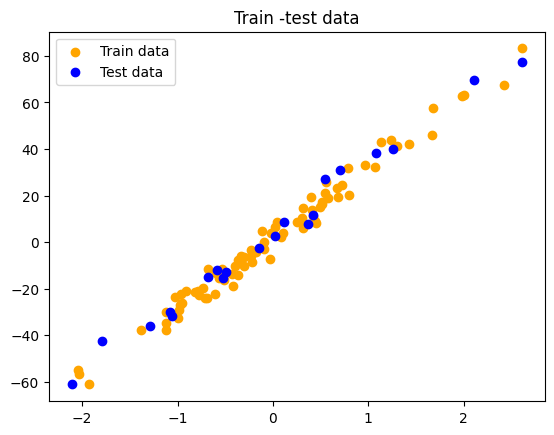

In [68]:
plt.scatter(X_train,Y_train,color="orange",label ="Train data")
plt.scatter(X_test,Y_test,color ="blue",label = "Test data")
plt.title("Train -test data")
plt.legend() #to call the labels 
plt.show()

## Modelling 

In [93]:
## Hypothrsis function
def hypothesis(X,theta):
    return theta[0]+theta[1]*X

def error(X,y,theta): #error function
    m= X.shape[0]
    e=0
    for i in range(0,m):
        y_i = hypothesis(X[i],theta) # y hat is y_ is h(theata) of xi #refer notes
        e = e + (y[i] - y_i)**2
    return e/(2*m)

def gradient(X,y,theta):
    m= X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        exp = hypothesis(X[i],theta) - y[i]
        grad[0] += exp
        grad[1] +=(exp)* X[i]
    return grad/m



def train(X,y,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range(100):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0]= theta[0] - learning_rate * grad[0]
        theta[1]= theta[1] - learning_rate * grad[1]
    plt.plot(error_list)
    return theta
    
        

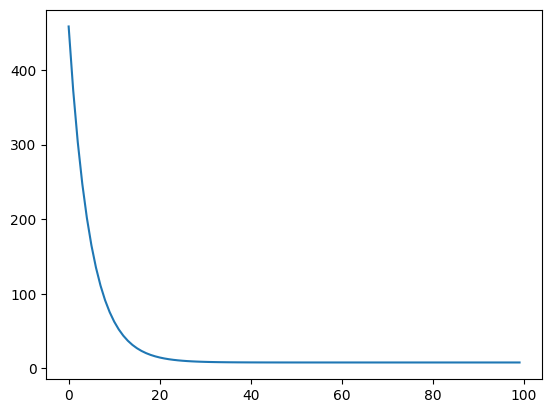

In [95]:
theta = train(X,y)

In [97]:
theta

array([ 2.09821344, 29.94417178])

In [103]:
def predict(X,y):
    return hypothesis(X,theta)

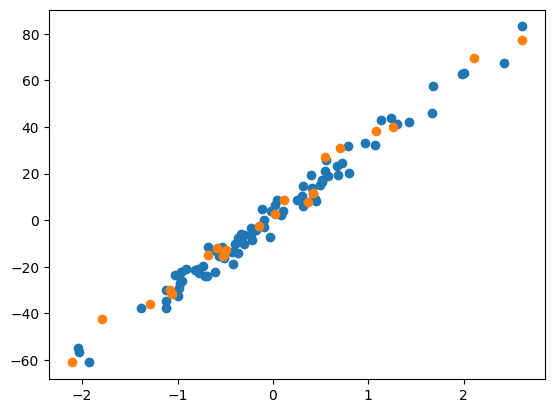

In [99]:
plt.scatter(X_train,Y_train)
plt.scatter(X_test,Y_test)
plt.show()

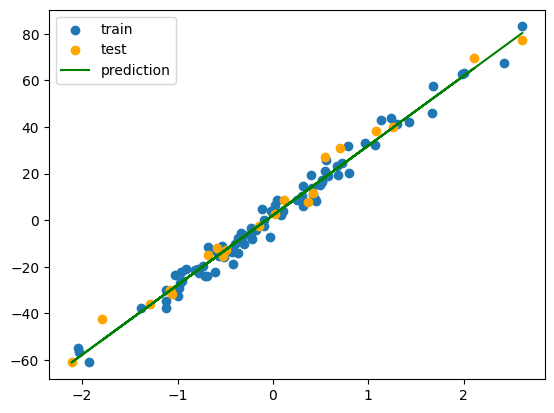

In [117]:
Y_pred = predict(X_test,theta)
plt.scatter(X_train,Y_train,label = "train")
plt.scatter(X_test,Y_test,color ="orange",label = "test")
plt.plot(X_test, Y_pred,color ="green",label = "prediction")
plt.legend()
plt.show()

## Model Evaluation --R2score

In [122]:
# for theoru refer notes
def r2Score(y,y_pred):
    y_mean = y.mean()
    num = np.sum((y-y_pred)**2)
    deno = np.sum((y-y_mean)**2)
    return 1 - num/deno
    
    

In [130]:
r2Score(Y_test, Y_pred)

0.9867378135329385